In [52]:
import numpy as np
import numdifftools as nd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from tqdm import tqdm

RANDOM_STATE: int = 52

# <font color = 'red'> ЛР 2. Дифференцирование функций многих переменных. Линейная регрессия по произвольному базису. </font>

Сложность: <font color = 'orange'> Нормально  </font>.

Дата составления: 16.09.2024

Срок выполнения: 2 недели.

Автор: ст. преподаватель Кушнеров А.В.

## <font color = 'green'> 1. Дифференцирование функции векторного аргумента. База.  </font>

Вспоминаем понятие дифференцирования.

Пусть, для начала, $f$ - функция одного аргумента, возвращающая один аргумент. Иными словами, $f:\mathbb{R} \rightarrow \mathbb{R}$.

Говорят, что $f$ **дифференцируема** в точке $x_{0}$, если существует конечный предел: $$\lim\limits_{h \to 0} \frac{f(x_{0}+h) - f(x_{0})}{h} = f'(x_{0})$$.

Его называют производной функции в точке $x_{0}$.  Это жу информацию можно записать в дифференциальной форме:  $$f(x_{0}+h) - f(x_{0}) = f'(x_{0}) h + o(h) = [Df_{x_{0}}](h) + o(h)$$.Величину $f'(x_{0}) h = [Df_{x_{0}}](h)$ называют **дифференциалом функции**.


Теперь предположим, что функция $f$ работает несколько иначе. Теперь она принимает на вход векторный аргумент, а возвращает всё ещё скалярный $f:\mathbb{R^{m}} \rightarrow \mathbb{R}$. 

Теперь понятие дифференциала вводят несколько иначе. Мы всё также можем записать: $$f(\overline{x_{0}}+\overline{h}) - f(\overline{x_{0}}) = \sum\limits_{j=1}^m \frac{\partial f}{\partial x_{m}}\bigg\rvert_{x=\overline{x_{0}}}h_{i} = [Df_{x_{0}}](\overline{h}) + o(||\overline{h}||)$$.

Или же в более сжатой форме: $$f(\overline{x_{0}}+\overline{h}) - f(\overline{x_{0}}) = (\nabla_{x_{0}} f)\cdot\overline{h} + o(||\overline{h}||) $$

Под производной в этом случае понимают **вектор** (чаще его пищут в виде вектор-столбца) градиента $\nabla_{x_{0}} f = \begin{bmatrix} \frac{\partial f}{\partial x_{1}}\\ \frac{\partial f}{\partial x_{2}}\\...\\\frac{\partial f}{\partial x_{m}} \end{bmatrix}\bigg\rvert_{x=\overline{x_{0}}}$.

В МО мы вынуждены работать с задачами оптимизации как раз таких функций, что немедленно отсылает нас к производным. В частности, используя лекционные записи, вы легко можете получить две несложных формулы матричного дифференцирования.

1. Если функция $f(\overline{x}) = \overline{a}^{T} \cdot\overline{x}$, то $f'(\overline{x}) = \overline{a} $. Где $\overline{x},\overline{a} $ - вектор столбцы.

2.  Если функция $f(\overline{x}) = \overline{x}^{T} A\overline{x}$, то $f'(\overline{x}) = (A+A^{T})\overline{x} $. Где $\overline{x}$ - вектор столбец, $A$ - квадратная матрица соответсвующего размера.


В будущем, возможно, мы дополним список. А пока можете поупражняться [самостоятельно](https://atmos.washington.edu/~dennis/MatrixCalculus.pdf). 


Теперь проверим справедливость формулы 2.

In [8]:
A = np.random.randint(10,size =(10,10))
A

array([[8, 2, 8, 4, 4, 4, 2, 5, 0, 1],
       [8, 2, 6, 8, 9, 8, 5, 9, 6, 3],
       [1, 5, 0, 1, 1, 2, 3, 5, 6, 1],
       [5, 3, 8, 3, 3, 7, 7, 3, 4, 4],
       [9, 7, 3, 5, 9, 9, 3, 4, 6, 2],
       [1, 3, 4, 7, 5, 5, 5, 5, 2, 4],
       [7, 7, 0, 8, 2, 6, 4, 8, 2, 6],
       [2, 9, 3, 3, 6, 2, 8, 2, 3, 7],
       [0, 7, 8, 2, 9, 8, 5, 0, 3, 6],
       [8, 8, 5, 4, 3, 4, 0, 9, 9, 4]], dtype=int32)

In [9]:
def func(x): 
    return np.dot(np.dot(x.T,A),x) #задаём вектор-функцию согласно формуле 2

In [10]:
x0 = np.arange(0,10) # конкретные значения x0
x0

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
grad = nd.Gradient(func)(x0) #находим производную в точке x0(градиент) встроенными численными методами
grad

array([316., 579., 324., 401., 455., 438., 408., 419., 415., 447.])

In [12]:
np.dot(A + A.T,x0) # а теперь по нашей формуле. Всё сходится.

array([316, 579, 324, 401, 455, 438, 408, 419, 415, 447])

<font color = 'red' size = 5>Задание 1 </font>

1. Изучите подробно формулы полученные выше. Попрактикуйтесь самостоятельно в их выводе.
2. Получите ещё 2 любых формулы для подобного матричного или векторного дифференцирования. Вывод формул кратко оформите в документе.
3. Проверьте справедливость полученных вами формул с помощью встроенных функций пакета numdifftools.

In [ ]:
# task3 (1)
a = np.random.randint(10, size=10)
a

array([7, 8, 9, 6, 8, 6, 7, 2, 8, 6], dtype=int32)

In [25]:
def func(x): 
    return a @ x

x0 = np.arange(0,10)

x0

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [26]:

grad = nd.Gradient(func)(x0)
grad

array([7., 8., 9., 6., 8., 6., 7., 2., 8., 6.])

In [27]:
a.T

array([7, 8, 9, 6, 8, 6, 7, 2, 8, 6], dtype=int32)

In [12]:
#task3 (2)
A = np.random.randint(10,size =(10,10))
A

array([[7, 5, 2, 7, 3, 5, 7, 6, 9, 3],
       [9, 5, 8, 0, 7, 4, 4, 0, 3, 3],
       [0, 1, 1, 1, 5, 7, 1, 9, 8, 4],
       [3, 8, 9, 6, 4, 0, 0, 2, 4, 2],
       [6, 9, 9, 3, 4, 1, 0, 4, 8, 2],
       [3, 5, 1, 4, 6, 9, 6, 4, 5, 7],
       [4, 2, 2, 2, 1, 0, 8, 8, 2, 5],
       [5, 2, 1, 4, 2, 9, 0, 2, 7, 3],
       [9, 4, 6, 3, 4, 3, 1, 5, 5, 2],
       [4, 1, 4, 6, 3, 5, 8, 1, 0, 0]], dtype=int32)

In [13]:
def func(x): 
    return x.T @ A @ A.T @ x

x0 = np.arange(0,10)

In [14]:
grad = nd.Gradient(func)(x0)
grad

array([19256., 15474., 12792., 13122., 16358., 17090., 11526., 12888.,
       15358., 11478.])

In [47]:
2 * A @ A.T @ x0

array([23326, 19002, 18672, 17454, 25638, 31598, 25662, 23530, 27486,
       23410])

In [ ]:
# #Matrix trace
# A = np.random.randint(10,size =(10,10))

#У нас же след матрицы возвращает скаляр, как мы производную потом брать будем от скаляра?

In [ ]:
# def func(x):
#     x = np.array(x)
#     return np.trace(x.T @ A @ x)

In [34]:
# grad = nd.Gradient(func)(x0)
# grad

## <font color = 'green'> 2. Линейная регрессия по произвольному базису. </font>

Пусть задано множество пар признаков(фич) и меток $A = \{(\overline{X}_{1},y_{1}),(\overline{X}_{2},y_{2}),...,(\overline{X}_{n},y_{n})\}$. Важно понимать, что теперь каждый элемент множества признаков это вектор состоящий из некоторого числа $k$ признаков  $\overline{X}_{i} = (x_{1},x_{2},...x_{k})$.

Стоит задача получить функцию, позволяющую предсказывать непрерывную метку по $y$ набору признаков $X$. Такую задачу называют множественной регрессией. 

Для решения данной задачи можно использовать формулу множественной регрессии:$$f(\overline{x})=\sum\limits_{j=1}^m w_{j} \phi_{j}(\overline{x}) $$.

В приведённой выше формуле, стоит взвешенная сумма некоторых произвольных функций от вектора фич. Это и есть **формула множественной линейной регрессии по произвольному базису**. 

Частным случаем такой регрессии можно считать тривиальную линейную регрессию, когда $\phi_{i}(\overline{X}) = x_{i}$. Тогда добавив фиктивную функцию $\phi_{0}(\overline{x}) = 1$ получим формулу **классической линейной регрессии**.

$$f(\overline{x})=w_{0} + \sum\limits_{j=1}^k w_{j} x_{j} $$

Тут $m = k + 1 $

Обратите внимание, что формула парной регресии $f(x) = a x +b $ - тоже частный случай вышеприведённой. 

Также стоит заметить, *что количество базисных функций может быть как меньшим, так и большим, чем количество изначальных фич*.

Теперь приступим к **обучению полученной модели** $f(\overline{x})=\sum\limits_{j=1}^m w_{j} \phi_{j}(\overline{x}) $. Оно сводится к нахождению весов $w_{1},...,w_{m}$ на основе исходных обучающих данных.

Аналогично парной регрессии составим функцию потерь и минимизируем её: $$ \mathcal{L}(\overline{w}) =\sum\limits_{i=1}^n (y_{i} - \sum\limits_{j=1}^m w_{j} \phi_{j}(\overline{X_{i}}))^2 \rightarrow min$$.

Конечно проще записать эту формулу в матричном виде (получите её самостоятельно): $$ \mathcal{L}(\overline{w}) = (\overline{y} - Q\cdot\overline{w})^{T}(\overline{y} - Q\cdot\overline{w}), $$
где $Q$ - *информационная матрица*, которая определяется следующим образом: $$Q=\begin{bmatrix}
    \phi_{1}(\overline{x_{1}})       &  \phi_{2}(\overline{x_{1}}) & \phi_{3}(\overline{x_{1}}) & \dots & \phi_{m}(\overline{x_{1}}) \\
    \phi_{1}(\overline{x_{2}})       &  \phi_{2}(\overline{x_{2}}) & \phi_{3}(\overline{x_{2}}) & \dots & \phi_{m}(\overline{x_{2}})   \\
                            ...\\
    \phi_{1}(\overline{x_{n}})       &  \phi_{2}(\overline{x_{n}}) & \phi_{3}(\overline{x_{n}}) & \dots & \phi_{m}(\overline{x_{n}}) 
    \end{bmatrix}, $$

$\overline{w}$ - вектор столбец весов: $$ \overline{w} = \begin{bmatrix} 
    w_{1}\\
    w_{2}\\
    ...\\
    w_{m}
    \end{bmatrix},
    $$

$\overline{y}$ - вектор столбец известных целевых меток: $$ \overline{y} = \begin{bmatrix} 
    y_{1}\\
    y_{2}\\
    ...\\
    y_{n}
    \end{bmatrix}.
    $$


Далее решаем задачу оптимизации. Отыщем производную полученной скалярной вектор-функции и приравняем к 0, опираясь на знания из п. 1.$$\frac{\partial \mathcal{L}}{\partial w} = \nabla \mathcal{L} =\nabla \mathcal{L}((\overline{y} - Q\cdot\overline{w})(\overline{y} - Q\cdot\overline{w})^{T}) = \nabla \mathcal{L} (\overline{y}^{T} \overline{y}-2\overline{y}^{T} Q\overline{w}+\overline{w}^{T} Q^{T} Q\overline{w} ) = 0$$

Далее применяем формулы из п. 1. $$\nabla \mathcal{L} (\overline{y}^{T} \overline{y}-2\overline{y}^{T} Q\overline{w}+\overline{w}^{T} Q^{T} Q\overline{w} ) = (-2 Q^{T} \overline{y}+ 2 Q^{T} Q \overline{w}) = 0.$$

Откуда немедленно получаем итоговую формулу для вектора весов: $$\overline{w} = (Q^{T} Q)^{-1} Q^{T} \overline{y}$$.


Полученная формула имеет некоторые ограничения (подумайте какие). Также следует продумывать выбор базисных функций. Для получения *информационной матрицы* исходные данные требуют некоторого преобразования в зависимости от выбора базисных функций.

<font color = 'orange' size = 3>Пример 1 </font>

Для начала используем встроенные возможности.

In [37]:
rng = np.random.RandomState(1) # задаём искусственные данные
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

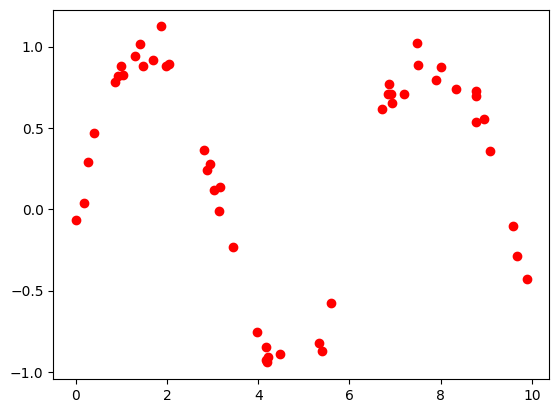

In [38]:
plt.scatter(x, y, c ='red')

In [39]:
from sklearn.linear_model import LinearRegression #пробуем обучить стандартную модель регрессии из ЛР1 
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [41]:
X = x[:, np.newaxis]
(X.shape,x.shape)

((50, 1), (50,))

In [42]:
model.fit(X, y)

LinearRegression()

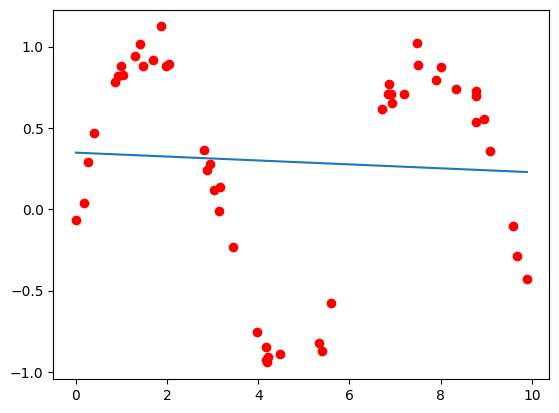

In [43]:
testx = np.linspace(np.min(x),np.max(x),50)[:, np.newaxis]# по рисунку видим, что получили хрень
plt.scatter(x, y, c ='red')
plt.plot(testx,model.predict(testx))

In [44]:
model.score(X,y)# позорище, а не модель

0.003269744706462907

In [45]:
(model.coef_,model.intercept_)

(array([-0.01203828]), np.float64(0.34794576296220453))

А теперь добавим другой базис. Видно, что функция похожа на степенную. Используем полиномиальный базис.
Класс [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) позволяет преобразовать ваши данные  и перейти от стандартного базиса ${x_1,x_2,...x_n}$ полиномиальному базису, который состоит из всех возможных функций $x_1^{k1}x_2^{k2}...x_n^{kn} : k1+k2+...kn<=4$

In [46]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4)

In [47]:
X_new = poly_reg.fit_transform(X)

In [48]:
X_new #вместо одного x теперь целый вектор фич степени от 0 до 4

array([[1.00000000e+00, 4.17022005e+00, 1.73907352e+01, 7.25231927e+01,
        3.02437672e+02],
       [1.00000000e+00, 7.20324493e+00, 5.18867376e+01, 3.73752880e+02,
        2.69223354e+03],
       [1.00000000e+00, 1.14374817e-03, 1.30815988e-06, 1.49620548e-09,
        1.71128228e-12],
       [1.00000000e+00, 3.02332573e+00, 9.14049845e+00, 2.76347041e+01,
        8.35487119e+01],
       [1.00000000e+00, 1.46755891e+00, 2.15372915e+00, 3.16072440e+00,
        4.63854925e+00],
       [1.00000000e+00, 9.23385948e-01, 8.52641608e-01, 7.87317280e-01,
        7.26997712e-01],
       [1.00000000e+00, 1.86260211e+00, 3.46928663e+00, 6.46190062e+00,
        1.20359498e+01],
       [1.00000000e+00, 3.45560727e+00, 1.19412216e+01, 4.12641722e+01,
        1.42592773e+02],
       [1.00000000e+00, 3.96767474e+00, 1.57424429e+01, 6.24608929e+01,
        2.47824507e+02],
       [1.00000000e+00, 5.38816734e+00, 2.90323473e+01, 1.56431145e+02,
        8.42877189e+02],
       [1.00000000e+00, 4.1919

In [49]:
model = LinearRegression(fit_intercept=False)
model

LinearRegression(fit_intercept=False)

In [50]:
model.fit(X_new, y)

LinearRegression(fit_intercept=False)

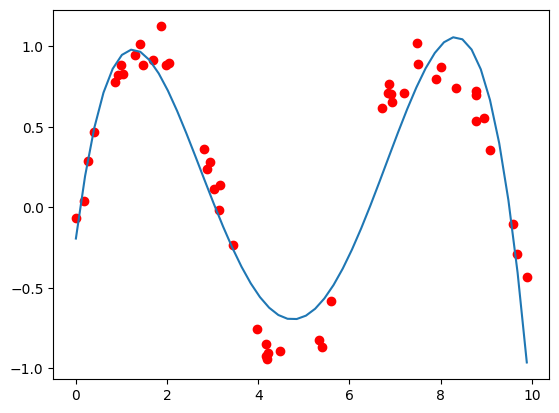

In [51]:
testx = np.linspace(np.min(x),np.max(x),50)[:, np.newaxis]
plt.scatter(x, y, c ='red')
plt.plot(testx,model.predict(poly_reg.fit_transform(testx)))
# теперь для предсказания модели нужно передавать преобразованные в тот же базис данные
# результат лучше

In [52]:
model.score(X_new,y)# уже лучше!

0.8709660328448405

In [53]:
(model.coef_,model.intercept_) # а вот и полученные веса для базисных функций. 

(array([-0.19599947,  2.16741907, -1.22565575,  0.20937262, -0.01096061]), 0.0)

**Упражнение** Подумайте, за что отвечает параметр fit_intercept и почему первый коэффициент равен 0

<font color = 'orange' size = 3>Пример 2 </font>

Теперь возьмём многомерные фичи. Используем рыбный датасет из файла Fish.csv и попробуем создать модель регрессии для предсказания веса (столбец weight).

Попробуем использовать стандартную формулу для классической регрессии $f(\overline{x})=w_{0} + \sum\limits_{j=1}^k w_{i} x_{i} $.


In [56]:
dataframe=pd.read_csv("Fish.csv") # загружаем данные
dataframe.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [57]:
X = dataframe.drop(["Species","Weight"],axis=1).values # выбираем то, что будет фичами

In [58]:
X

array([[23.2   , 25.4   , 30.    , 11.52  ,  4.02  ],
       [24.    , 26.3   , 31.2   , 12.48  ,  4.3056],
       [23.9   , 26.5   , 31.1   , 12.3778,  4.6961],
       [26.3   , 29.    , 33.5   , 12.73  ,  4.4555],
       [26.5   , 29.    , 34.    , 12.444 ,  5.134 ],
       [26.8   , 29.7   , 34.7   , 13.6024,  4.9274],
       [26.8   , 29.7   , 34.5   , 14.1795,  5.2785],
       [27.6   , 30.    , 35.    , 12.67  ,  4.69  ],
       [27.6   , 30.    , 35.1   , 14.0049,  4.8438],
       [28.5   , 30.7   , 36.2   , 14.2266,  4.9594],
       [28.4   , 31.    , 36.2   , 14.2628,  5.1042],
       [28.7   , 31.    , 36.2   , 14.3714,  4.8146],
       [29.1   , 31.5   , 36.4   , 13.7592,  4.368 ],
       [29.5   , 32.    , 37.3   , 13.9129,  5.0728],
       [29.4   , 32.    , 37.2   , 14.9544,  5.1708],
       [29.4   , 32.    , 37.2   , 15.438 ,  5.58  ],
       [30.4   , 33.    , 38.3   , 14.8604,  5.2854],
       [30.4   , 33.    , 38.5   , 14.938 ,  5.1975],
       [30.9   , 33.5   , 38

In [59]:
y = dataframe["Weight"].values # вес будем предсказывать

In [60]:
y

array([ 242. ,  290. ,  340. ,  363. ,  430. ,  450. ,  500. ,  390. ,
        450. ,  500. ,  475. ,  500. ,  500. ,  340. ,  600. ,  600. ,
        700. ,  700. ,  610. ,  650. ,  575. ,  685. ,  620. ,  680. ,
        700. ,  725. ,  720. ,  714. ,  850. , 1000. ,  920. ,  955. ,
        925. ,  975. ,  950. ,   40. ,   69. ,   78. ,   87. ,  120. ,
          0. ,  110. ,  120. ,  150. ,  145. ,  160. ,  140. ,  160. ,
        169. ,  161. ,  200. ,  180. ,  290. ,  272. ,  390. ,  270. ,
        270. ,  306. ,  540. ,  800. , 1000. ,   55. ,   60. ,   90. ,
        120. ,  150. ,  140. ,  170. ,  145. ,  200. ,  273. ,  300. ,
          5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
         85. ,   85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,
        130. ,  135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,
        225. ,  145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,
        265. ,  250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,
      

In [61]:
model = LinearRegression(fit_intercept=True) # модель регрессии по умолчанию будет использовать стандартный базис
model

LinearRegression()

In [62]:
model.fit(X, y)

LinearRegression()

In [63]:
model.score(X,y)

0.8852867046546207

In [64]:
(model.coef_,model.intercept_)

(array([ 62.35521443,  -6.52675249, -29.02621861,  28.29735132,
         22.47330665]),
 np.float64(-499.5869553569422))

<font color = 'red' size = 5>Задание 2 </font>

1. Изучите подробно описанные выше примеры.
2. Реализуйте функции для работы регрессии по произвольному базису самостоятельно (используйте только базовые функции и numpy), используя формулы, полученные выше. Используйте матричные вычисления!
3. Попрактикуйте модели и вашу и встроенную на разных искусственных данных.
4. Постройте модели (встроенную и вашу) для прогнозирования веса рыбы из файла Fish.csv. Попробуйте различные базисы, различные комбинации фич и постарайтесь повысить точность прогноза.
5. Попытайтесь предсказать [Цену дома (Med house val)](https://www.kaggle.com/datasets/shibumohapatra/house-price/data) используя вашу собственную и встроенные модели с различными базисами. 
6. Подумайте, как повлияет на модель использование слишком большого количества базисных фич.
7. В примере выше мы тестируем полученную модель на тех же данных, что и обучаем. В целом это не очень хорошо. Разделите изначальные данные на обучающую и тестовую выборку и повторите вычисления точности.
8. Попробуйте на тестовых или реальных данных повышать сложность модели. Например добавляя фичи всё большей и большей степени. Как это влияет на точность на обучющих и тестовых данных??


Указание! Для оценки качества модели, в случае, если рисунок не возможен используйте [коэффициент детерминации](https://wiki.loginom.ru/articles/coefficient-of-determination.html): $$R^{2}=1-\frac{(\overline{y} -f(\overline{x}))(\overline{y} - f(\overline{x}))^{T}}{(\overline{y} - mean(\overline{y}))(\overline{y} - mean(\overline{y}))^{T}},$$

где $\overline{y}$ - столбец обучающих меток, $f(\overline{x})$ - функция предсказания применённая к вектор столбцу исходных признаков. 

In [2]:
#task2
class LinearRegressionCustom():
    #конструктор
    def __init__(self):
        #наши веса
        self.w = None

    def fit(self, X, y):
        #проверяем на то что матрица не вырождена
        if np.abs(np.linalg.det(X.T @ X)) > 0.001:
            print(np.linalg.det(X.T @ X))
            self.w = np.linalg.inv(X.T @ X) @ X.T @ y
        
        #регуляризуем ее если вырождена
        else:
            self.w = np.linalg.inv((xx:=(X.T @ X)) + np.eye(xx.shape[0])) @ X.T @ y
            print(f'Error: Singular matrix!\nWeights calculated with identity matrix')

        return self

    def predict(self, X):
        #проверяем представлен ли Х в виде датафрейма 
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        return X @ self.w

In [3]:
def plot_lin_reg(x, y_true, y_pred):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(x[::,0], x[::,1], y_true)
    ax.plot_trisurf(x[::,0], x[::,1], y_pred, color='tab:orange', alpha=0.3)
    plt.show()

47842.23670027249


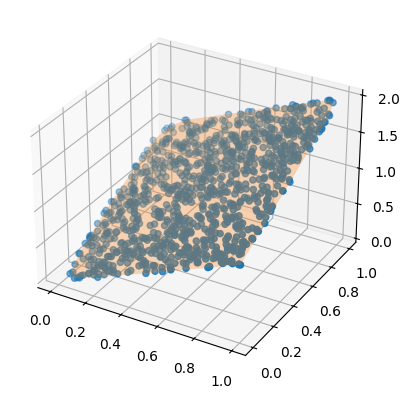

In [4]:
#task3
#y = w1x1 + w2x2
N = 1000
x = np.random.rand(N, 2)
y_true = x[::,0] + x[::,1]
y_pred = LinearRegressionCustom().fit(x, y_true).predict(x)

plot_lin_reg(x, y_true, y_pred)

0.5366220548451069


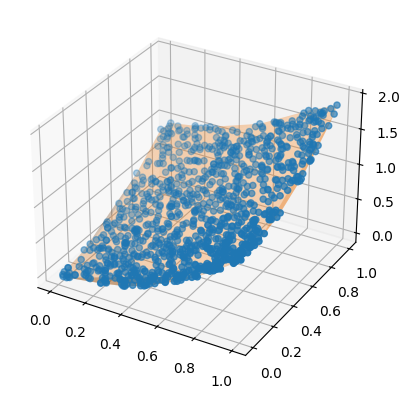

In [5]:
#y = w1x1^2 + w2x2^2, polinom_deg = 4
pf = PolynomialFeatures(degree=4)
x = np.random.rand(N, 2)
y_true = x[::,0] ** 2 + x[::,1] ** 2
y_pred = LinearRegressionCustom().fit(pf.fit_transform(x), y_true).predict(pf.fit_transform(x))

plot_lin_reg(x, y_true, y_pred)

Error: Singular matrix!
Weights calculated with identity matrix


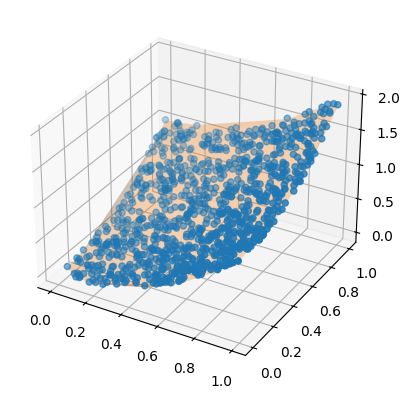

In [ ]:
#возьмем 9 для проверки на невырожденность
pf = PolynomialFeatures(degree=9)
x = np.random.rand(N, 2)
y_true = x[::,0] ** 2 + x[::,1] ** 2
lr = LinearRegressionCustom().fit(pf.fit_transform(x), y_true)
y_pred = lr.predict(pf.fit_transform(x))

plot_lin_reg(x, y_true, y_pred)

In [9]:
lr.w

array([-3.20648567e-02,  2.56903066e-01,  2.54370900e-01,  3.43396589e-01,
        6.38584157e-03,  3.44695754e-01,  2.56265992e-01,  3.81619961e-02,
        3.01492083e-02,  2.60861158e-01,  1.55935067e-01,  2.18600756e-02,
        2.96913500e-02,  1.41246402e-02,  1.60448518e-01,  7.76864082e-02,
        1.99053661e-05,  1.67159472e-02,  1.57604850e-02, -5.99267894e-03,
        8.06842602e-02,  2.31600407e-02, -1.56212290e-02,  4.33677379e-03,
        9.12123378e-03,  4.08116601e-03, -1.97715999e-02,  2.43638360e-02,
       -1.28196879e-02, -2.44548243e-02, -3.23690018e-03,  2.60609814e-03,
        3.08139880e-03, -2.41234330e-03, -2.68812824e-02, -1.32234586e-02,
       -3.55779055e-02, -2.81913559e-02, -6.56005868e-03, -8.89921377e-04,
        5.12421559e-04,  4.43777174e-04, -4.62960873e-03, -2.90984628e-02,
       -3.72459223e-02, -4.92521181e-02, -2.85590407e-02, -6.98354718e-03,
       -1.73893713e-03, -5.44624953e-04,  2.73686653e-04,  5.21839839e-04,
       -4.03697080e-03, -

In [ ]:
#task 4 (моя модель)
df_fish = pd.read_csv('Fish.csv')
df_fish

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [11]:
df_fish.drop(columns=['Species']).corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


In [13]:
df_fish_encoded = pd.get_dummies(df_fish, columns=['Species'], prefix='sp')
df_fish_encoded

,Weight,Length1,Length2,Length3,Height,Width,sp_Bream,sp_Parkki,sp_Perch,sp_Pike,sp_Roach,sp_Smelt,sp_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,True,False,False,False,False,False,False
1,290.0,24.0,26.3,31.2,12.4800,4.3056,True,False,False,False,False,False,False
2,340.0,23.9,26.5,31.1,12.3778,4.6961,True,False,False,False,False,False,False
3,363.0,26.3,29.0,33.5,12.7300,4.4555,True,False,False,False,False,False,False
4,430.0,26.5,29.0,34.0,12.4440,5.1340,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,False,False,False,False,False,True,False
155,13.4,11.7,12.4,13.5,2.4300,1.2690,False,False,False,False,False,True,False
156,12.2,12.1,13.0,13.8,2.2770,1.2558,False,False,False,False,False,True,False
157,19.7,13.2,14.3,15.2,2.8728,2.0672,False,False,False,False,False,True,False


In [ ]:
#приводим к единому масштабу
X = pd.DataFrame(MinMaxScaler().fit_transform(df_fish_encoded.drop(columns=['Weight'])),
                 columns=df_fish_encoded.columns[~df_fish_encoded.columns.isin(['Weight'])])
X

,Length1,Length2,Length3,Height,Width,sp_Bream,sp_Parkki,sp_Perch,sp_Pike,sp_Roach,sp_Smelt,sp_Whitefish
0,0.304854,0.309091,0.358108,0.568334,0.418978,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.320388,0.325455,0.378378,0.624055,0.459235,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.318447,0.329091,0.376689,0.618123,0.514279,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.365049,0.374545,0.417230,0.638566,0.480365,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.368932,0.374545,0.425676,0.621966,0.576004,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
154,0.077670,0.069091,0.077703,0.021012,0.048771,0.0,0.0,0.0,0.0,0.0,1.0,0.0
155,0.081553,0.072727,0.079392,0.040723,0.031208,0.0,0.0,0.0,0.0,0.0,1.0,0.0
156,0.089320,0.083636,0.084459,0.031842,0.029347,0.0,0.0,0.0,0.0,0.0,1.0,0.0
157,0.110680,0.107273,0.108108,0.066424,0.143719,0.0,0.0,0.0,0.0,0.0,1.0,0.0


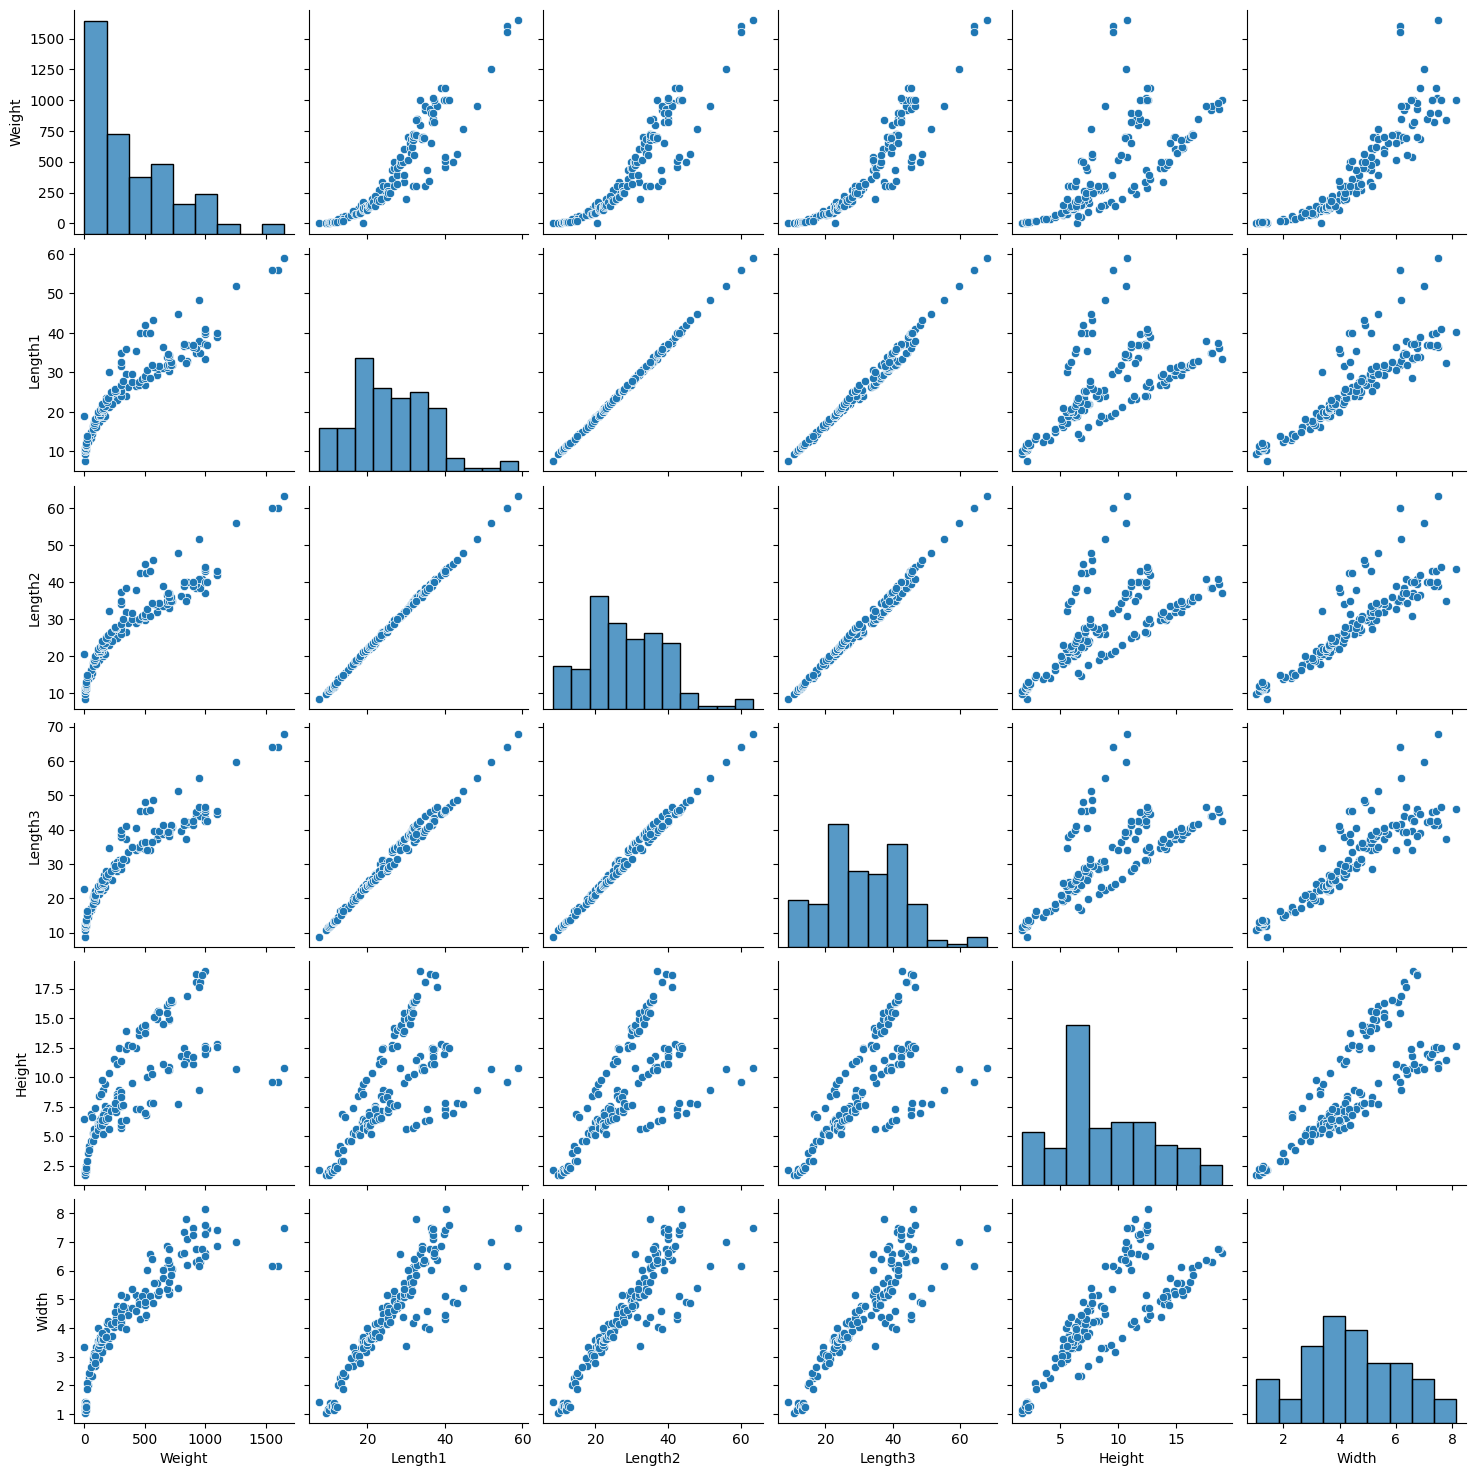

In [ ]:
#смотрим связи
sns.pairplot(df_fish)

<Axes: >

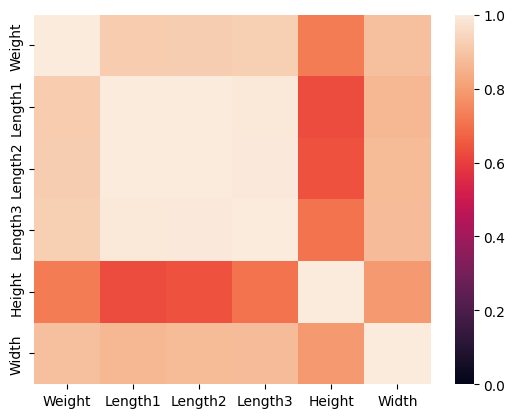

In [16]:
sns.heatmap(df_fish.drop(columns=['Species']).corr(), vmin=0)

In [17]:
y = df_fish['Weight']
y

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=RANDOM_STATE)

In [95]:
# Обучение модели Lasso
lasso = Lasso().fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
r2_score(y_test, y_pred_lasso)

c:\Users\Nikita\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.706e+07, tolerance: 1.049e+05
  model = cd_fast.enet_coordinate_descent(


0.8459212377079763

In [23]:
lasso.coef_

array([   0.        , 1694.58603125,    0.        ,  115.95468308,
        220.83494152,   -0.        ,   19.52191237,    0.        ,
       -190.06610194,  -12.99797573,  238.06655899,    0.        ])

In [ ]:
#выбираем лучшие признаки
best_features_mask = np.abs(lasso.coef_) > 100
best_features_mask

array([False,  True, False,  True,  True, False, False, False,  True,
       False,  True, False])

In [25]:
lasso.coef_[best_features_mask]

array([1694.58603125,  115.95468308,  220.83494152, -190.06610194,
        238.06655899])

In [26]:
X.columns[best_features_mask]

Index(['Length2', 'Height', 'Width', 'sp_Pike', 'sp_Smelt'], dtype='object')

In [ ]:
X_filtered = X.drop(columns=X.columns[~best_features_mask]) #Выбрасываем ненужные фичи
X_train_filtered, X_test_filtered, _, _ = train_test_split(X_filtered, y, train_size=0.75, random_state=RANDOM_STATE)

In [ ]:
#смотрим на нормальную модель
lr_skl = LinearRegression().fit(X_train_filtered, y_train)
y_pred_skl = lr_skl.predict(X_test_filtered)
r2_score(y_test, y_pred_skl)

0.9197525841167901

In [ ]:
#смотрим на нашу модель
lr = LinearRegressionCustom().fit(X_train_filtered, y_train)
y_pred_c = lr.predict(X_test_filtered)
r2_score(y_test, y_pred_c)

1775.3977750456797


0.682749307502628

In [ ]:
pf = PolynomialFeatures(degree=3, include_bias=False) #без смещения
X_filtered_poly = X_filtered.drop(columns=['sp_Pike', 'sp_Smelt'])
X_filtered_poly = pd.DataFrame(pf.fit_transform(X_filtered_poly), columns=pf.get_feature_names_out(X_filtered_poly.columns))
X_filtered_poly[['sp_Pike', 'sp_Smelt']] = X_filtered[['sp_Pike', 'sp_Smelt']]
X_filtered_poly

,Length2,Height,Width,Length2^2,Length2 Height,Length2 Width,Height^2,Height Width,Width^2,Length2^3,...,Length2^2 Width,Length2 Height^2,Length2 Height Width,Length2 Width^2,Height^3,Height^2 Width,Height Width^2,Width^3,sp_Pike,sp_Smelt
0,0.309091,0.568334,0.418978,0.095537,0.175667,0.129502,0.323004,0.238120,0.175543,0.029530,...,0.040028,0.099837,0.073601,0.054259,0.183574,0.135332,0.099767,0.073549,0.0,0.0
1,0.325455,0.624055,0.459235,0.105921,0.203102,0.149460,0.389445,0.286588,0.210897,0.034472,...,0.048643,0.126747,0.093271,0.068637,0.243035,0.178847,0.131612,0.096851,0.0,0.0
2,0.329091,0.618123,0.514279,0.108301,0.203419,0.169245,0.382076,0.317888,0.264483,0.035641,...,0.055697,0.125738,0.104614,0.087039,0.236170,0.196494,0.163483,0.136018,0.0,0.0
3,0.374545,0.638566,0.480365,0.140284,0.239172,0.179918,0.407767,0.306745,0.230750,0.052543,...,0.067388,0.152727,0.114890,0.086426,0.260386,0.195877,0.147349,0.110844,0.0,0.0
4,0.374545,0.621966,0.576004,0.140284,0.232954,0.215740,0.386841,0.358255,0.331780,0.052543,...,0.080804,0.144890,0.134183,0.124267,0.240602,0.222822,0.206356,0.191107,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,0.069091,0.021012,0.048771,0.004774,0.001452,0.003370,0.000441,0.001025,0.002379,0.000330,...,0.000233,0.000031,0.000071,0.000164,0.000009,0.000022,0.000050,0.000116,0.0,1.0
155,0.072727,0.040723,0.031208,0.005289,0.002962,0.002270,0.001658,0.001271,0.000974,0.000385,...,0.000165,0.000121,0.000092,0.000071,0.000068,0.000052,0.000040,0.000030,0.0,1.0
156,0.083636,0.031842,0.029347,0.006995,0.002663,0.002454,0.001014,0.000934,0.000861,0.000585,...,0.000205,0.000085,0.000078,0.000072,0.000032,0.000030,0.000027,0.000025,0.0,1.0
157,0.107273,0.066424,0.143719,0.011507,0.007126,0.015417,0.004412,0.009546,0.020655,0.001234,...,0.001654,0.000473,0.001024,0.002216,0.000293,0.000634,0.001372,0.002969,0.0,1.0


In [31]:
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_filtered_poly, y, random_state=RANDOM_STATE)

In [32]:
lr_skl = LinearRegression().fit(X_train_poly, y_train_poly)
y_pred_skl = lr_skl.predict(X_test_poly)
r2_score(y_test_poly, y_pred_skl)

0.9857928802891284

In [33]:
lr = LinearRegressionCustom().fit(X_train_poly, y_train_poly)
y_pred_c = lr.predict(X_test_poly)
r2_score(y_test_poly, y_pred_c)

Error: Singular matrix!
Weights calculated with identity matrix


0.9752813379922244

In [34]:
#task5
df_house = pd.read_csv('housing.csv')
df_house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [35]:
df_house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [37]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [38]:
df_house.dropna(inplace=True)
y = df_house['median_house_value']
X = df_house.drop(columns='median_house_value')
X_filtered = X.drop(columns='ocean_proximity')
X_encoded = pd.get_dummies(X, dtype=np.int8)

In [39]:
X_train_filtered, X_test_filtered, y_train, y_test = train_test_split(X_filtered, y, train_size=0.75, random_state=RANDOM_STATE)
X_train_enc, X_test_enc, _, _ = train_test_split(X_encoded, y, train_size=0.75, random_state=RANDOM_STATE)

In [40]:
df_house.drop(columns='ocean_proximity').corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


In [98]:
correlation_with_target = df_house.drop(columns='ocean_proximity').corr()['median_house_value']
print(correlation_with_target.sort_values(ascending=False))

median_house_value    1.000000
median_income         0.688355
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
population           -0.025300
longitude            -0.045398
latitude             -0.144638
Name: median_house_value, dtype: float64


In [ ]:
#median_income единственный признак, подходящий для предсказания
#обучим регрессию на всех данных(с полиномиальными фичами без категориального признака "ocean_proximity")

lr_skl_poly = make_pipeline(PolynomialFeatures(degree=2), LinearRegression()).fit(X_train_filtered, y_train)
lr_skl = LinearRegression().fit(X_train_enc, y_train)
lr_poly = make_pipeline(PolynomialFeatures(degree=2), LinearRegressionCustom()).fit(X_train_filtered, y_train)
lr = LinearRegressionCustom().fit(X_train_enc, y_train)

inf
2.6973634387344612e+70


c:\Users\Nikita\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\linalg\_linalg.py:2432: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


In [43]:
print(f'''
{r2_score(y_train, lr_skl_poly.predict(X_train_filtered))=}
{r2_score(y_test, lr_skl_poly.predict(X_test_filtered))=}

{r2_score(y_train, lr_skl.predict(X_train_enc))=}
{r2_score(y_test, lr_skl.predict(X_test_enc))=}

{r2_score(y_train, lr_poly.predict(X_train_filtered))=}
{r2_score(y_test, lr_poly.predict(X_test_filtered))=}

{r2_score(y_train, lr.predict(X_train_enc))=}
{r2_score(y_test, lr.predict(X_test_enc))=}
''')


r2_score(y_train, lr_skl_poly.predict(X_train_filtered))=0.7005523024804121
r2_score(y_test, lr_skl_poly.predict(X_test_filtered))=0.5878885912453973

r2_score(y_train, lr_skl.predict(X_train_enc))=0.6489804398088963
r2_score(y_test, lr_skl.predict(X_test_enc))=0.6375270241251154

r2_score(y_train, lr_poly.predict(X_train_filtered))=0.7005523024804057
r2_score(y_test, lr_poly.predict(X_test_filtered))=0.5878885828033376

r2_score(y_train, lr.predict(X_train_enc))=0.6489804398088963
r2_score(y_test, lr.predict(X_test_enc))=0.6375270241255451



In [ ]:
#создаем свою фичу
x = df_house['median_income'].to_numpy()[:, np.newaxis]
x

array([[8.3252],
       [8.3014],
       [7.2574],
       ...,
       [1.7   ],
       [1.8672],
       [2.3886]])

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=RANDOM_STATE)
single_lr_skl = LinearRegression().fit(x_train, y_train)
single_lr = LinearRegressionCustom().fit(x_train, y_train)

283770.58852136985


In [46]:
print(f'''
{r2_score(y_train, single_lr_skl.predict(x_train))=}
{r2_score(y_test, single_lr_skl.predict(x_test))=}

{r2_score(y_train, single_lr.predict(x_train))=}
{r2_score(y_test, single_lr.predict(x_test))=}
''')


r2_score(y_train, single_lr_skl.predict(x_train))=0.47626425720744414
r2_score(y_test, single_lr_skl.predict(x_test))=0.4664400275844567

r2_score(y_train, single_lr.predict(x_train))=0.4478564530540926
r2_score(y_test, single_lr.predict(x_test))=0.4342714867540314



In [ ]:
y = df_house['median_house_value']              #выбрали признак для прогнозирования
X = df_house.drop(columns='median_house_value') 
X_filtered = X.drop(columns='ocean_proximity')  
X_encoded = pd.get_dummies(X, dtype=np.int8)    

In [48]:
X_train_filtered, X_test_filtered, y_train, y_test = train_test_split(X_filtered, y, train_size=0.75, random_state=RANDOM_STATE)

In [ ]:
#функция для того, чтобы смотреть как менялся r2score 
def plot_loss_curve(base_model, degrees, data):
    """
    :param base_model: model for train with polynomial_features 
    :param degrees: polynomial degree of data
    :param data = (X_train, X_test, y_train, y_test)
    """
    X_train, X_test, y_train, y_test = data
    scores_train = []
    scores_test = []

    for deg in tqdm(degrees):
        lr_skl_poly = make_pipeline(PolynomialFeatures(degree=deg), base_model).fit(X_train, y_train)
        scores_train.append(r2_score(y_train, lr_skl_poly.predict(X_train)))
        scores_test.append(r2_score(y_test, lr_skl_poly.predict(X_test)))

    fig, ax = plt.subplots()
    ax.set_ylim(0, 1)
    ax.plot(degrees, scores_train, label='train', marker='o')
    ax.plot(degrees, scores_test, label='test', marker='o')
    ax.legend()
    fig.show()

100%|██████████| 5/5 [00:01<00:00,  3.64it/s]
C:\Users\Nikita\AppData\Local\Temp\ipykernel_24344\1216349443.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


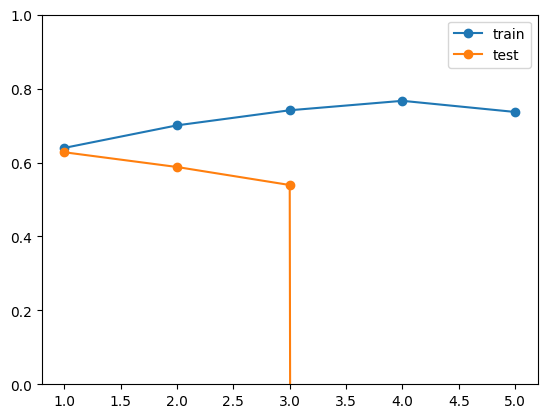

In [51]:
plot_loss_curve(LinearRegression(), range(1,6), (X_train_filtered, X_test_filtered, y_train, y_test))

In [ ]:
#Подумайте, как повлияет на модель использование слишком большого количества базисных фич.

#Переобучение 
# (степень полинома слишком высокая 
# -> 
# модель начинает подстраиваться под шум в данных, вместо того чтобы выявлять основные закономерности)

#Увеличение сложности модели
# (увеличением количества базисных признаков растёт и сложность модели)
# (yвеличению времени обучения)
# (yроблемам с численной стабильностью)

#Размывание интерпретируемости

<font color = 'red' size = 5>Задание 3. </font>

1. Используя полученные знания о линейной регрессии примените их на реальных данных.
Применяйте различные методы, стройте валидационные кривые, подбирайте гиперпараметры, преобразуйте данные, для получения лучших по качеству эстиматоров.
Данные о велосипедном трафике из файлов (fermont_bridge.csv) и (BycicleWeather.csv). В одном из файлов данные о количестве велосипедистов, проехавщих по мосту в виде временного ряда, а в другом данные о погоде в том же районе. Совместите и предскажите велотрафик.
3. При работе используйте не только встроенные, но и свои собственные функции. 

to be continued... 🧡

In [53]:
df = pd.read_csv('BicycleWeather.csv')
df.head()

,STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,...,WT17,WT05,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03
0,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20120101,0,0,0,128,50,47,100,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
1,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20120102,109,0,0,106,28,45,180,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20120103,8,0,0,117,72,23,180,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999
3,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20120104,203,0,0,122,56,47,180,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
4,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20120105,13,0,0,89,28,61,200,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999


In [54]:
df.describe()

,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,...,WT17,WT05,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03
count,1.340000e+03,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,...,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,2.013427e+07,28.292537,0.324627,-29.545522,166.672388,83.249254,24.692537,170.840299,22.154478,64.513433,...,-9991.537313,-9984.074627,-9491.537313,-9931.835821,-9961.686567,-8543.776119,-7999.000000,-9767.656716,-9849.746269,-9887.059701
std,1.063978e+04,62.763097,4.479127,545.736003,74.331651,50.563330,274.396498,296.343588,1298.860605,276.304370,...,273.179182,386.189416,2195.610628,817.085672,609.934146,3527.583977,4001.493373,1503.861989,1212.995740,1052.472800
min,2.012010e+07,0.000000,0.000000,-9999.000000,-16.000000,-71.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
25%,2.012118e+07,0.000000,0.000000,0.000000,111.000000,44.000000,22.000000,107.500000,120.000000,54.000000,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
50%,2.013107e+07,0.000000,0.000000,0.000000,156.000000,83.000000,30.000000,200.000000,205.000000,67.000000,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
75%,2.014100e+07,25.000000,0.000000,0.000000,222.000000,122.000000,40.000000,230.000000,240.000000,89.000000,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
max,2.015090e+07,559.000000,80.000000,173.000000,356.000000,183.000000,95.000000,360.000000,360.000000,192.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   STATION       1340 non-null   object
 1   STATION_NAME  1340 non-null   object
 2   DATE          1340 non-null   int64 
 3   PRCP          1340 non-null   int64 
 4   SNWD          1340 non-null   int64 
 5   SNOW          1340 non-null   int64 
 6   TMAX          1340 non-null   int64 
 7   TMIN          1340 non-null   int64 
 8   AWND          1340 non-null   int64 
 9   WDF2          1340 non-null   int64 
 10  WDF5          1340 non-null   int64 
 11  WSF2          1340 non-null   int64 
 12  WSF5          1340 non-null   int64 
 13  FMTM          1340 non-null   int64 
 14  WT14          1340 non-null   int64 
 15  WT01          1340 non-null   int64 
 16  WT17          1340 non-null   int64 
 17  WT05          1340 non-null   int64 
 18  WT02          1340 non-null   int64 
 19  WT22  

In [56]:
df['STATION_NAME'].unique(), df['STATION'].unique() 

(array(['SEATTLE TACOMA INTERNATIONAL AIRPORT WA US'], dtype=object),
 array(['GHCND:USW00024233'], dtype=object))

In [57]:
df.drop(columns=['STATION_NAME', 'STATION'], inplace=True)

In [58]:
df.columns

Index(['DATE', 'PRCP', 'SNWD', 'SNOW', 'TMAX', 'TMIN', 'AWND', 'WDF2', 'WDF5',
       'WSF2', 'WSF5', 'FMTM', 'WT14', 'WT01', 'WT17', 'WT05', 'WT02', 'WT22',
       'WT04', 'WT13', 'WT16', 'WT08', 'WT18', 'WT03'],
      dtype='object')

In [59]:
df = df.copy()
df['DATE'] = pd.to_datetime(df['DATE'].map(str).map(lambda s: s[:4] + '-' + s[4:6] + '-' + s[6:]))
df['month'] = df['DATE'].dt.month
df['is_weekend'] = df['DATE'].dt.weekday.isin([5,6])*1
df = pd.concat([df, pd.get_dummies(df['DATE'].dt.weekday, prefix='weekday', dtype=np.int8)], axis=1)
df.rename(columns={'DATE': 'Date'}, inplace=True)
df

,Date,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,...,WT03,month,is_weekend,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,2012-01-01,0,0,0,128,50,47,100,90,89,...,-9999,1,1,0,0,0,0,0,0,1
1,2012-01-02,109,0,0,106,28,45,180,200,130,...,-9999,1,0,1,0,0,0,0,0,0
2,2012-01-03,8,0,0,117,72,23,180,170,54,...,-9999,1,0,0,1,0,0,0,0,0
3,2012-01-04,203,0,0,122,56,47,180,190,107,...,-9999,1,0,0,0,1,0,0,0,0
4,2012-01-05,13,0,0,89,28,61,200,220,107,...,-9999,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,2015-08-28,5,0,0,233,156,26,230,240,81,...,-9999,8,0,0,0,0,0,1,0,0
1336,2015-08-29,325,0,0,222,133,58,210,210,157,...,-9999,8,1,0,0,0,0,0,1,0
1337,2015-08-30,102,0,0,200,128,47,200,200,89,...,-9999,8,1,0,0,0,0,0,0,1
1338,2015-08-31,0,0,0,189,161,58,210,210,112,...,-9999,8,0,1,0,0,0,0,0,0


In [60]:
ts = pd.read_csv('fremont-bridge.csv')
ts.head()

,Date,West,East
0,10/3/2012 0:00,4.0,9.0
1,10/3/2012 1:00,4.0,6.0
2,10/3/2012 2:00,1.0,1.0
3,10/3/2012 3:00,2.0,3.0
4,10/3/2012 4:00,6.0,1.0


In [61]:
ts.describe()

,West,East
count,45976.000000,45976.000000
mean,54.712306,55.479315
std,72.935797,80.232055
min,0.000000,0.000000
25%,7.000000,7.000000
50%,29.000000,28.000000
75%,72.000000,68.000000
max,854.000000,717.000000


In [62]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45984 entries, 0 to 45983
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    45984 non-null  object 
 1   West    45976 non-null  float64
 2   East    45976 non-null  float64
dtypes: float64(2), object(1)
memory usage: 1.1+ MB


In [63]:
na_mask = ts.isna().any(axis=1)
ts[na_mask]

,Date,West,East
6105,6/14/2013 9:00,NaN,NaN
6106,6/14/2013 10:00,NaN,NaN
12530,3/9/2014 2:00,NaN,NaN
21266,3/8/2015 2:00,NaN,NaN
22331,4/21/2015 11:00,NaN,NaN
22332,4/21/2015 12:00,NaN,NaN
30170,3/13/2016 2:00,NaN,NaN
38906,3/12/2017 2:00,NaN,NaN


In [68]:
ts['West'].interpolate(m='spline', order=5)
ts['East'].interpolate(m='spline', order=5)
ts[na_mask]

,Date,West,East
6105,6/14/2013 9:00,116.000000,67.666667
6106,6/14/2013 10:00,72.000000,41.333333
12530,3/9/2014 2:00,0.000000,0.000000
21266,3/8/2015 2:00,3.500000,1.500000
22331,4/21/2015 11:00,51.333333,44.000000
22332,4/21/2015 12:00,37.666667,37.000000
30170,3/13/2016 2:00,2.000000,0.500000
38906,3/12/2017 2:00,1.500000,0.500000


In [69]:
ts['target'] = np.sum(ts.loc[:,'West':'East'], axis=1)
ts = ts.drop(columns=['West', 'East'])
ts['Date'] = pd.to_datetime(ts['Date'].map(lambda s: s.split(' ')[0]))
ts = ts.groupby('Date').sum().reset_index()
ts

,Date,target
0,2012-10-03,3521.0
1,2012-10-04,3475.0
2,2012-10-05,3148.0
3,2012-10-06,2006.0
4,2012-10-07,2142.0
...,...,...
1911,2017-12-27,997.0
1912,2017-12-28,972.0
1913,2017-12-29,591.0
1914,2017-12-30,725.0


In [70]:
def plot_ts(x, y):
    plt.plot(x, y)
    plt.xticks(rotation=30, ha='right')
    plt.show()

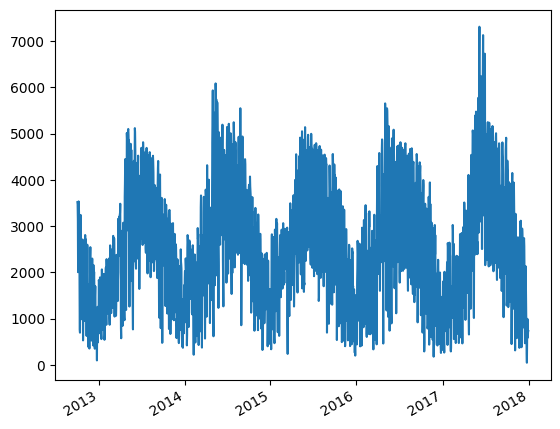

In [71]:
plot_ts(ts["Date"], ts["target"])

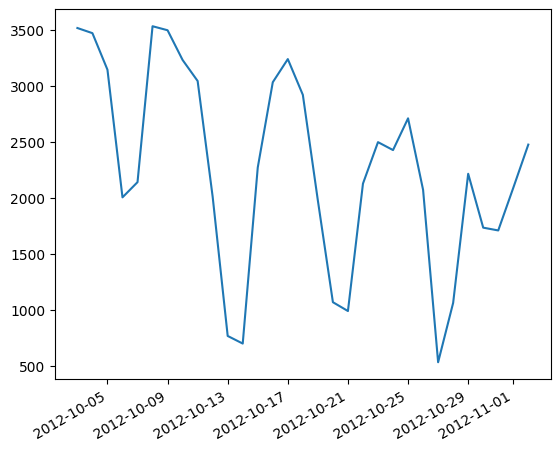

In [72]:
plot_ts(ts["Date"][:31], ts["target"][:31])

In [74]:
join_df = df.join(ts.set_index('Date'), on='Date', how='inner').reset_index()
join_df

,index,Date,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,...,month,is_weekend,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,target
0,276,2012-10-03,0,0,0,189,78,73,10,20,...,10,0,0,0,1,0,0,0,0,3521.0
1,277,2012-10-04,0,0,0,189,83,65,20,20,...,10,0,0,0,0,1,0,0,0,3475.0
2,278,2012-10-05,0,0,0,217,89,57,360,360,...,10,0,0,0,0,0,1,0,0,3148.0
3,279,2012-10-06,0,0,0,239,78,51,20,20,...,10,1,0,0,0,0,0,1,0,2006.0
4,280,2012-10-07,0,0,0,239,78,13,30,10,...,10,1,0,0,0,0,0,0,1,2142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,1335,2015-08-28,5,0,0,233,156,26,230,240,...,8,0,0,0,0,0,1,0,0,2653.0
1060,1336,2015-08-29,325,0,0,222,133,58,210,210,...,8,1,0,0,0,0,0,1,0,699.0
1061,1337,2015-08-30,102,0,0,200,128,47,200,200,...,8,1,0,0,0,0,0,0,1,1213.0
1062,1338,2015-08-31,0,0,0,189,161,58,210,210,...,8,0,1,0,0,0,0,0,0,2823.0


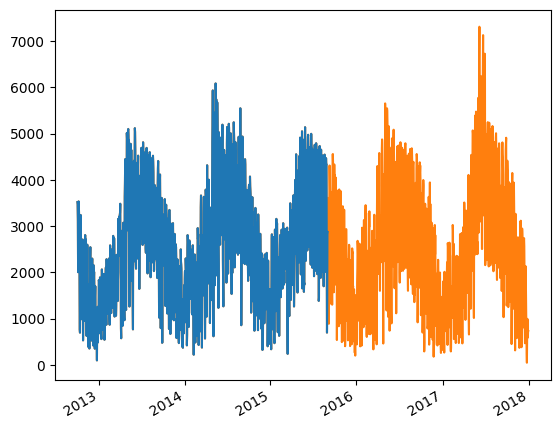

In [ ]:
plt.plot(ts["Date"], ts["target"], color='tab:orange') #потери временного после join 
plt.plot(join_df['Date'], join_df['target'], color='tab:blue')
plt.xticks(rotation=30, ha='right')
plt.show()

In [76]:
final_df = join_df.drop(columns=['index', 'Date'])
final_df

,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,...,month,is_weekend,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,target
0,0,0,0,189,78,73,10,20,103,125,...,10,0,0,0,1,0,0,0,0,3521.0
1,0,0,0,189,83,65,20,20,94,112,...,10,0,0,0,0,1,0,0,0,3475.0
2,0,0,0,217,89,57,360,360,80,98,...,10,0,0,0,0,0,1,0,0,3148.0
3,0,0,0,239,78,51,20,20,76,94,...,10,1,0,0,0,0,0,1,0,2006.0
4,0,0,0,239,78,13,30,10,54,63,...,10,1,0,0,0,0,0,0,1,2142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,5,0,0,233,156,26,230,240,81,103,...,8,0,0,0,0,0,1,0,0,2653.0
1060,325,0,0,222,133,58,210,210,157,206,...,8,1,0,0,0,0,0,1,0,699.0
1061,102,0,0,200,128,47,200,200,89,112,...,8,1,0,0,0,0,0,0,1,1213.0
1062,0,0,0,189,161,58,210,210,112,134,...,8,0,1,0,0,0,0,0,0,2823.0


In [77]:
corr_matr = final_df.corr()
corr_matr

,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,...,month,is_weekend,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,target
PRCP,1.000000,-0.010320,-0.003609,-0.197062,-0.041590,0.000897,-0.009352,0.010453,0.017822,0.021982,...,0.019676,0.028465,-2.680002e-02,-0.013975,0.010205,-1.507756e-02,0.008898,0.017843,1.890530e-02,-0.363941
SNWD,-0.010320,1.000000,0.002577,-0.065787,-0.062740,0.001064,-0.000561,0.004036,0.000421,0.004396,...,-0.022942,0.040513,-1.569062e-02,0.010460,-0.015691,-1.569062e-02,-0.015691,-0.015691,6.799271e-02,-0.063229
SNOW,-0.003609,0.002577,1.000000,0.029403,0.029770,-0.002851,0.005933,-0.005251,-0.005617,-0.009090,...,-0.000849,0.005043,-1.889437e-02,-0.062715,0.024992,2.499205e-02,0.025115,-0.018482,2.499205e-02,0.009848
TMAX,-0.197062,-0.065787,0.029403,1.000000,0.877840,-0.016616,0.051692,-0.000294,-0.023663,-0.020932,...,0.117737,0.001424,2.773727e-02,0.002789,-0.011232,-1.029684e-02,-0.010836,-0.004401,6.239729e-03,0.666598
TMIN,-0.041590,-0.062740,0.029770,0.877840,1.000000,-0.034155,0.034836,-0.001833,-0.039008,-0.019989,...,0.177052,-0.010213,6.554709e-03,0.006449,-0.009919,7.995388e-04,0.009300,-0.001682,-1.150280e-02,0.519127
AWND,0.000897,0.001064,-0.002851,-0.016616,-0.034155,1.000000,0.949169,0.242909,0.998682,0.244411,...,-0.023871,0.021545,1.306953e-02,-0.075406,0.010433,1.060800e-02,0.013480,0.014684,1.313063e-02,-0.015532
WDF2,-0.009352,-0.000561,0.005933,0.051692,0.034836,0.949169,1.000000,0.238819,0.947449,0.226856,...,-0.018224,0.024722,2.707671e-02,-0.085735,0.008600,1.088955e-02,0.007252,0.028630,3.286485e-03,0.032111
WDF5,0.010453,0.004036,-0.005251,-0.000294,-0.001833,0.242909,0.238819,1.000000,0.246315,0.996850,...,-0.063635,-0.011647,-3.456284e-02,0.006150,0.027911,2.996550e-02,-0.014427,-0.006533,-8.503680e-03,0.006238
WSF2,0.017822,0.000421,-0.005617,-0.023663,-0.039008,0.998682,0.947449,0.246315,1.000000,0.249054,...,-0.023674,0.022093,1.382282e-02,-0.074307,0.008948,8.887691e-03,0.014126,0.016373,1.214886e-02,-0.027179
WSF5,0.021982,0.004396,-0.009090,-0.020932,-0.019989,0.244411,0.226856,0.996850,0.249054,1.000000,...,-0.063478,-0.018141,-3.330407e-02,0.009273,0.029454,2.969979e-02,-0.011702,-0.010963,-1.245694e-02,-0.008215


In [78]:
final_df['FMTM'].unique(), final_df['WT17'].unique()

(array([-9999]), array([-9999]))

In [79]:
X = final_df.drop(columns=['target', 'FMTM', 'WT17'])
y = final_df['target']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [81]:
affordable_columns = corr_matr[np.abs(corr_matr['target']) > 0.3].T.columns[:-1]
affordable_columns

Index(['PRCP', 'TMAX', 'TMIN', 'WT01', 'WT16', 'is_weekend', 'weekday_5',
       'weekday_6'],
      dtype='object')

In [82]:
X_train_filtered = X_train.loc[:,affordable_columns]
X_test_filtered = X_test.loc[:,affordable_columns]

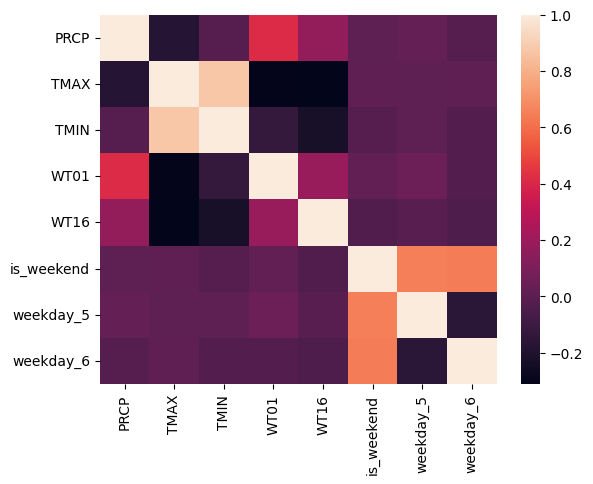

In [83]:
sns.heatmap(X_train_filtered.corr())
plt.show()

100%|██████████| 3/3 [00:00<00:00, 118.56it/s]

2.9417779353166597e+30
Error: Singular matrix!
Weights calculated with identity matrix
Error: Singular matrix!
Weights calculated with identity matrix



C:\Users\Nikita\AppData\Local\Temp\ipykernel_24344\1216349443.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


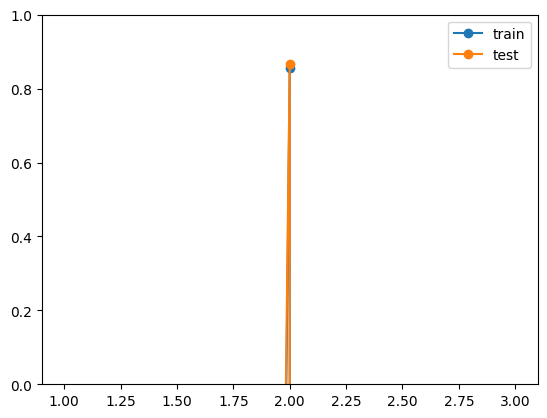

In [84]:
plot_loss_curve(LinearRegressionCustom(), range(1,4), (X_train_filtered, X_test_filtered, y_train, y_test))

100%|██████████| 4/4 [00:00<00:00, 50.68it/s]
C:\Users\Nikita\AppData\Local\Temp\ipykernel_24344\1216349443.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


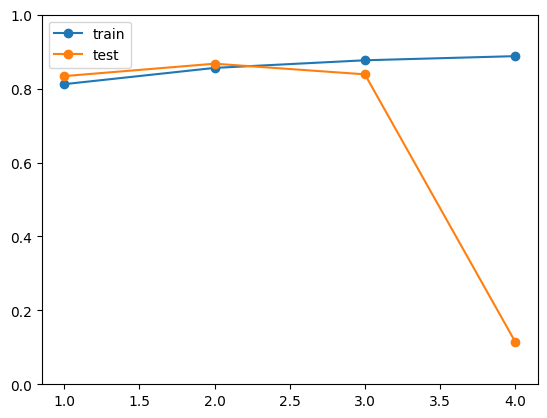

In [85]:
plot_loss_curve(LinearRegression(), range(1,5), (X_train_filtered, X_test_filtered, y_train, y_test))

100%|██████████| 3/3 [00:00<00:00,  8.67it/s]
C:\Users\Nikita\AppData\Local\Temp\ipykernel_24344\1216349443.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


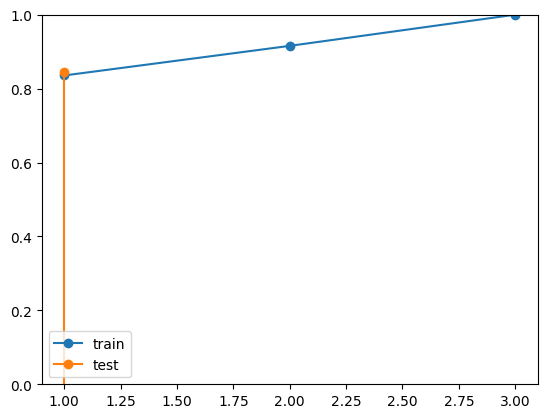

In [86]:
plot_loss_curve(LinearRegression(), range(1,4), (X_train, X_test, y_train, y_test))

In [87]:
lr_skl_poly = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
lr_skl_poly.fit(X_train_filtered, y_train)
y_pred = lr_skl_poly.predict(X_test_filtered)
r2_score(y_test, y_pred)

0.8673508502081562

In [88]:
X_filtered = X.loc[:,affordable_columns]
X_filtered

,PRCP,TMAX,TMIN,WT01,WT16,is_weekend,weekday_5,weekday_6
0,0,189,78,-9999,-9999,0,0,0
1,0,189,83,-9999,-9999,0,0,0
2,0,217,89,-9999,-9999,0,0,0
3,0,239,78,-9999,-9999,1,1,0
4,0,239,78,-9999,-9999,1,0,1
...,...,...,...,...,...,...,...,...
1059,5,233,156,1,-9999,0,0,0
1060,325,222,133,1,-9999,1,1,0
1061,102,200,128,1,-9999,1,0,1
1062,0,189,161,-9999,-9999,0,0,0


In [89]:
date_ser = join_df['Date']
date_ser

0      2012-10-03
1      2012-10-04
2      2012-10-05
3      2012-10-06
4      2012-10-07
          ...    
1059   2015-08-28
1060   2015-08-29
1061   2015-08-30
1062   2015-08-31
1063   2015-09-01
Name: Date, Length: 1064, dtype: datetime64[ns]

In [90]:
window_start = 366
window_end = -1
X_test_year = X_filtered[window_start:window_end]
y_test_year = y[window_start:window_end]
date_ser_year = date_ser[window_start:window_end]
X_test_year

,PRCP,TMAX,TMIN,WT01,WT16,is_weekend,weekday_5,weekday_6
366,0,178,56,-9999,-9999,0,0,0
367,0,200,83,-9999,-9999,1,1,0
368,41,228,78,1,-9999,1,0,1
369,5,161,117,1,-9999,0,0,0
370,69,139,78,-9999,-9999,0,0,0
...,...,...,...,...,...,...,...,...
1058,0,294,144,-9999,-9999,0,0,0
1059,5,233,156,1,-9999,0,0,0
1060,325,222,133,1,-9999,1,1,0
1061,102,200,128,1,-9999,1,0,1


C:\Users\Nikita\AppData\Local\Temp\ipykernel_24344\1473028149.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


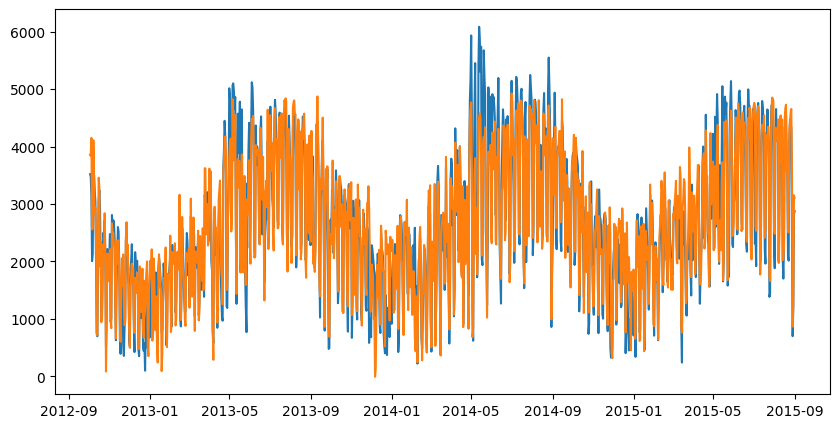

In [91]:
y_pred_year = lr_skl_poly.predict(X_filtered)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(date_ser, y)
ax.plot(date_ser, y_pred_year)

fig.show()

C:\Users\Nikita\AppData\Local\Temp\ipykernel_24344\59341183.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


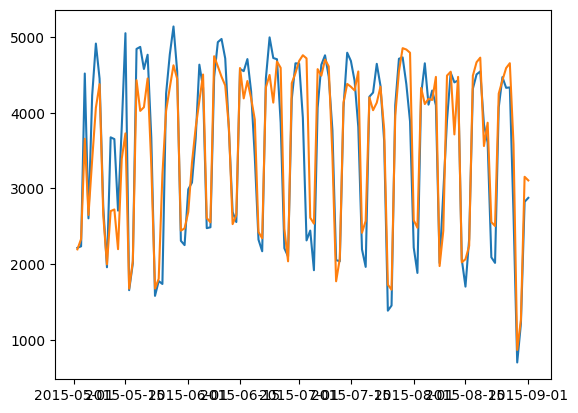

In [92]:
q_mask = date_ser > pd.to_datetime('2015-05-01')
fig, ax = plt.subplots()
ax.plot(date_ser[q_mask], y[q_mask])
ax.plot(date_ser[q_mask], y_pred_year[q_mask])
fig.show()

In [93]:
r2_score(y[q_mask], y_pred_year[q_mask])

0.8291384825940139